In [1]:
import sys
sys.path.append('..')
# %matplotlib notebook
%matplotlib inline

import math as m
import numpy as np
import scipy.signal as signal

import matplotlib
import matplotlib.pyplot as plt
from core import Core

from global_var import COLORS


In [2]:
print(COLORS)
COLORS.append('#44DD55')

['#ffb200', '#0284C0', '#DD5544', '#008000', '#DD84C0', '#000000']


In [3]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [ ]:
folder = r'C:\SPRUP_data_Jenda\2021_08_30_noise/'.replace('\\', '/')


for i in range(1, 8):
    print(i)    
    name = 'raw_{:02d}_1'.format(i)
    core = Core(folder, name)
    core.k = 10
    core._data_raw = core._data_raw[400:800, 800:1200, :]

    core.type = 'raw'
    core_raw_std = [np.std(core.frame(i)) for i in range(len(core))]
    core_raw_int = [np.average(core.frame(i)) for i in range(len(core))]


    core.type = 'diff'
    core_diff_std = [np.std(core.frame(i)) for i in range(len(core))]
    core_diff_int = [np.average(np.abs(core.frame(i))) for i in range(len(core))]
    
    np.save(folder + name + '_raw_int' + '.npy', core_raw_int)
    np.save(folder + name + '_raw_std' + '.npy', core_raw_std)
    
    np.save(folder + name + '_diff_int' + '.npy', core_diff_int)
    np.save(folder + name + '_diff_std' + '.npy', core_diff_std)
    
    np.save(folder + name + '_time' + '.npy', core._time_info[:,0])
    
    std = np.std(core._data_raw, axis = 2)
    print(std)
    np.save(folder + name + '_raw_std_px' + '.npy', np.average(std))
    np.save(folder + name + '_raw_std_std_px' + '.npy', np.std(std))    

In [4]:
area = 1936 * 1216
folder = r'C:\SPRUP_data_Jenda\2021_08_30_noise/'.replace('\\', '/')


frame_time = [0.1047, 0.1308, 0.1308, 0.1002, 0.1003, 0.1046, 0.1305]
frame_time = [f*10 for f in frame_time] # per 100 ms

ets = [12.5, 5, 1, 25, 25, 12.5, 5]
avg = [8, 10, 10, 4, 4, 8, 10]
ma = [58.7, 60.7, 62.9, 56.0, 'SC', 'SC', 'SC']



raw_int = []
raw_std = []
raw_std_px = []
raw_std_std_px = []



diff_int = []
diff_std = []
time = []

depth = 32700

for i in range(1,8):
    name = 'raw_{:02d}_1'.format(i)
    raw_int.append(np.load(folder + name + '_raw_int' + '.npy')*depth)
    raw_std.append(np.load(folder + name + '_raw_std' + '.npy')*depth)
    raw_std_px.append(np.load(folder + name + '_raw_std_px' + '.npy')*depth)
    raw_std_std_px.append(np.load(folder + name + '_raw_std_std_px' + '.npy')*depth)
    
    
    
    diff_std.append(np.load(folder + name + '_diff_std' + '.npy')*depth)
    diff_int.append(np.load(folder + name + '_diff_int' + '.npy')*depth)
    time.append(np.load(folder + name + '_time' + '.npy')*depth)    
    
data = [frame_time, ets, avg, ma, raw_int, raw_std, raw_std_px, raw_std_std_px, diff_int, diff_std, time]
    
for d in data:
    d[0], d[1], d[2], d[4], d[5], d[6] = d[2], d[1], d[0], d[6], d[5], d[4]
    
    


In [5]:
print(raw_std_px)
print(raw_std_std_px)

[165.5654165635095, 60.60750564954978, 52.93179192830461, 71.78369367664699, 18.680438853483942, 34.71204977567007, 70.13887685596293]
[63.548885765503286, 11.064679021109935, 7.0729242441604745, 8.181991292123294, 1.4410914894609583, 3.8293114199964746, 9.96538421005153]


In [55]:
correction = [frame_time[i] / ets[i] / avg[i] * 1000 for i in range(7)]
# intensity = [np.average(raw_int[i])*avg[i]/frame_time[i] for i in range(7)]
e_count = [np.average(raw_int[i]) for i in range(7)]

print(intensity)
print(correction)
print(e_count)

[150421.88297973527, 161818.29590709673, 151847.25890391375, 81534.52236531698, 24882.529137421556, 62329.016321711926, 64598.30617512365]
[130.8, 26.16, 10.47, 10.02, 26.1, 10.46, 10.030000000000001]
[19675.182293749374, 21165.833104648253, 19873.01000904971, 20424.397852511906, 3247.1700524335133, 8149.518884063835, 16198.025273412259]


In [9]:
print([int((e*avg[i]**-1)**0.5) for i, e in enumerate(e_count)])
print([int(r) for r in raw_std_px])

[140, 145, 140, 142, 56, 90, 127]
[44, 46, 49, 71, 18, 31, 63]
[165, 60, 52, 71, 18, 34, 70]


In [39]:
a = [44, 46, 49, 71, 18, 31, 63]
a_sort = np.sort(a)
print(int(np.round(0.9*len(a)))-1)

a_sort[int(np.round(0.9*len(a)))-1]

5


63

1.0194040520083174
1.0353766173657102
1.0122634526514893
[1.4621020420674473, 1.0233991661360227, 1.0]
[1.412565240810622, 0.9968964583058662, 1.0]
[1.3285726470580606, 0.9836748200127595, 1.0]
--------------------
[0.0020080166453497654, 0.0014055124070084606, 0.0013733765411546664]
[0.005549418575141633, 0.003916417849869182, 0.003928610456220071]
[0.0057528366398563995, 0.004259398655244367, 0.004330088123216488]
EBL
[0.002075383496283607, 0.001493325111076611, 0.0014022799691378403]


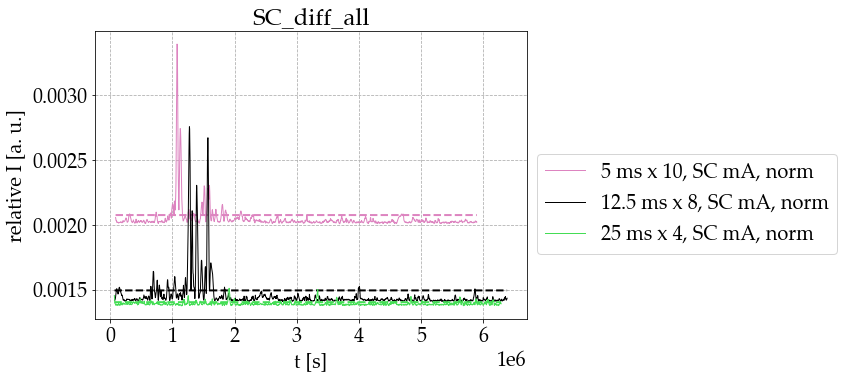

In [60]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')

title = 'SC_diff_all'
axes.set_title(title)
axes.set_xlabel('t [s]')
# axes.set_ylabel('std [a. u.]')
# axes.set_ylabel('I [a. u.]')
axes.set_ylabel('relative I [a. u.]')



ii = []
levels = []
effective_noise_levels = []
nsr = []
nsr_std = []

for i in [5, 6, 7]:
    i -= 1
    
#     variable = diff_int[i][20:]/intensity[i]
    variable = diff_int[i][20:]/e_count[i]
    
#     variable = raw_int[i][20:]*avg[i]
#     variable = raw_int[i][20:]/e_count[i]
    
#     variable = raw_std[i][20:]/e_count[i]
#     variable = raw_std[i][20:]
    
    
    axes.plot(
        time[i][20:], 
        variable, 
        linewidth=1, 
        label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
        color = COLORS[i]
    )
    
    level = np.min(variable)
    
    variable_sorted = np.sort(variable)
    
    effective_noise_levels.append(variable_sorted[int(np.round(0.9*len(variable)))-1])
    
    
    
    
    
    level_avg = np.average(variable)
    
    print(level_avg/level)
    
    levels.append(level)
#     nsr.append(1/(e_count[i])**0.5)


    nsr.append((1/e_count[i]/avg[i])**0.5)
    
    nsr_std.append(raw_std_px[i]/e_count[i])
    
    axes.plot(
        time[i][20:], 
        effective_noise_levels[-1] * np.ones(len(time[i][20:])),      
        linewidth=2, 
        ls = '--', 
#         label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
        color = COLORS[i]
    )
        
#     axes.plot(
#         time[i][20:], 
#         level * np.ones(len(time[i][20:])),      
#         linewidth=2, 
#         ls = '-.', 
# #         label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
#         color = COLORS[i]
#     )
    

    
    ii.append(i)
    
print([l/levels[-1] for l in levels])
print([n/nsr[-1] for n in nsr])
print([n/nsr_std[-1] for n in nsr_std])

print('-'*20)

# print([l * 10**0.5 for l in levels])
print(levels)

print(nsr)
print(nsr_std)
print('EBL')
print(effective_noise_levels)

lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# fig.savefig(folder + 'plots/' + title +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    


3: 0.0003355988634630829
3: 0.0019236960581031767
3: 0.0009709887821546587
4: 0.00035558120702466217
4: 0.002043017266300862
4: 0.0011046248594773313
--------------------
measured 4/3: 1.059542345749861
estimated 4/3: 1.0620270586380156
std px 4/3: 1.1376288581070209


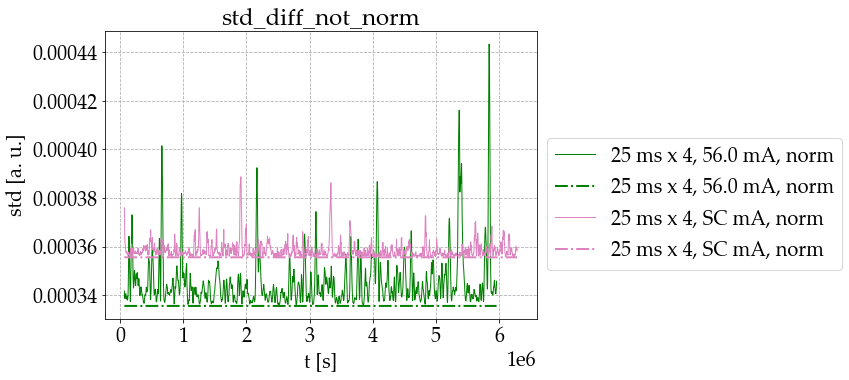

In [6]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')

title = 'std_diff_not_norm'
axes.set_title(title)
axes.set_xlabel('t [s]')
axes.set_ylabel('std [a. u.]')


ii = []
a = []
b = []
c = []

for i in [4 ,5]:

#     axes.plot(std_time[i][20:], diff_int[i][20:], linewidth=2, label = '{} ms x {}, {} mA'.format(ets[i], avg[i], ma[i]), color = COLORS[i])
   
    variable = diff_int[i][20:]/intensity[i]
#     variable = diff_int[i][20:]
#     variable = diff_std[i][20:]/intensity[i]

#     variable = raw_std[i][20:]/intensity[i]
#     variable = raw_std_px[i][20:]
#     variable = raw_int[i][20:]
    
    axes.plot(
        time[i][20:], 
        variable, 
        linewidth=1, 
        label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
        color = COLORS[i]
    )
    
    level = np.min(variable)
        
    axes.plot(
        time[i][20:], 
        level * np.ones(len(time[i][20:])),      
        linewidth=2, 
        ls = '-.', 
        label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
        color = COLORS[i]
    )
    
    a.append(level)
#     b.append(avg[i]**0.5/intensity[i]**0.5)
#     b.append(avg[i]**0.5/intensity_uncor[i]**0.5)

#     b.append(1/e_count[i]**0.5)
    b.append(1/(intensity[i]*avg[i])**0.5)
    
    c.append(raw_std_px[i]/intensity[i])
    
    ii.append(i)
    
    print('{}: {}'.format(i, a[-1]))
    print('{}: {}'.format(i, b[-1]))
    print('{}: {}'.format(i, c[-1]))
    

#     axes.plot(std_time[i][20:], diff_std[i][20:], linewidth=2, label = '{} ms x {}, {} mA'.format(ets[i], avg[i], ma[i]), color = COLORS[i])
#     axes.plot(std_time[i][20:], diff_std[i][20:]/intensity[i], linewidth=2, ls = '--', label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), color = COLORS[i])

#     axes.plot(std_time[i][20:], raw_std[i][20:], linewidth=2, label = '{} ms x {}, {} mA'.format(ets[i], avg[i], ma[i]), color = COLORS[i])
#     axes.plot(std_time[i][20:], raw_std[i][20:]/intensity[i], linewidth=2, label = '{} ms x {}, {} mA'.format(ets[i], avg[i], ma[i]), color = COLORS[i])

print('-'*20)
print('measured {}/{}: {}'.format(ii[1], ii[0], a[1]/a[0]))
print('estimated {}/{}: {}'.format(ii[1], ii[0], b[1]/b[0]))
print('std px {}/{}: {}'.format(ii[1], ii[0], c[1]/c[0]))
    
# axes.plot(core._time_info[:,0], core_diff_std, linewidth=2)
# axes.set_ylim(0, 0.09)


lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# fig.savefig(folder + title +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    


In [101]:
for i in [5, 6]:
    print(intensity[i])
    print(intensity_uncor[i])
    print(correction[i])
    print(e_count[i])
    print(e_count[i]**0.5)


    print('-'*20)



56635.10403955727
59240.31882537691
10.46
7405.039853172114
86.05254123599207
--------------------
22618.94591148483
29517.724414487704
26.1
2951.77244144877
54.3302166519587
--------------------


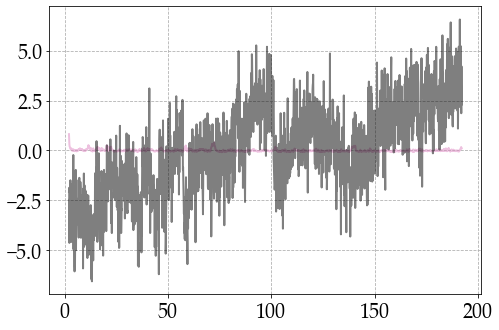

In [7]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')
i = 4
axes.plot(
    std_time[i][20:], 
    diff_std[i][20:] - np.average(diff_std[i][20:]), 
    linewidth=2, 
#     ls = '--', 
    label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
    color = COLORS[i],
    alpha = 0.5
)

axes.plot(
    std_time[i][20:], 
    raw_std[i][20:] - np.average(raw_std[i][20:]), 
    linewidth=2, 
#     ls = '--', 
    label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
    color = COLORS[i+1],
    alpha = 0.5
    
)

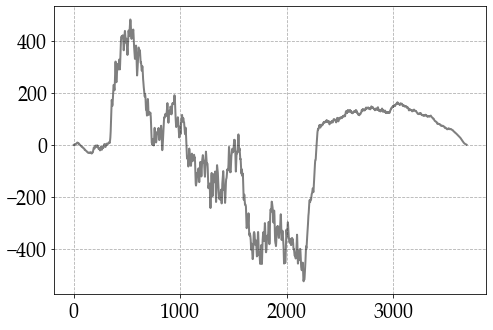

In [8]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')
i = 5

correlation = np.correlate(
    diff_int[i][20:] - np.average(diff_int[i][20:]), 
    raw_std[i][20:] - np.average(raw_std[i][20:]), 
    mode = 'full')


axes.plot(
    correlation, 
    linewidth=2, 
#     ls = '--', 
    label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
    color = COLORS[i],
    alpha = 0.5
)


[66375.03563748217, 58965.77708646618]
[1.002, 1.003]
[16560.63763410234, 14697.352214971632]


In [99]:
182.84992948016145/124.46422527311236

1.469096273077128